In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

in the above cell i imported the necessary libraries

In [3]:
pd.read_csv("DiamondPricesData.csv")
data=pd.read_csv("DiamondPricesData.csv")
data

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


finding the datatypes we have in our dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   price    53940 non-null  int64  
 1   carat    53940 non-null  float64
 2   cut      53940 non-null  object 
 3   color    53934 non-null  object 
 4   clarity  53940 non-null  object 
 5   depth    53926 non-null  float64
 6   table    53940 non-null  float64
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
data.isnull().sum()

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64

In [6]:
data.fillna(method="bfill",inplace=True)
data

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


dropping duplicated rows from the dataset

In [7]:
data.isnull().sum()

price      0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [8]:
data.duplicated().sum()

np.int64(146)

In [9]:
data.drop_duplicates()
data=data.drop_duplicates()

In [10]:
data.describe()

,price,carat,depth,table,x,y,z
count,53794.000000,53794.00000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,3933.065082,0.79778,61.748327,57.458109,5.731214,5.734653,3.538714
std,3988.114460,0.47339,1.430019,2.233679,1.120695,1.141209,0.705037
min,326.000000,0.20000,43.000000,43.000000,0.000000,0.000000,0.000000
25%,951.000000,0.40000,61.000000,56.000000,4.710000,4.720000,2.910000
50%,2401.000000,0.70000,61.800000,57.000000,5.700000,5.710000,3.530000
75%,5326.750000,1.04000,62.500000,59.000000,6.540000,6.540000,4.030000
max,18823.000000,5.01000,79.000000,95.000000,10.740000,58.900000,31.800000


when mean is greater than median the dataset is positively skewed

checking for outliers in data set using boxplots

we categorise the data into continous and categorical data

In [11]:
cont_data=data.select_dtypes(exclude=("object"))
cat_data=data.select_dtypes(include=(object))

most o our variables have outliers and we have to remove them we use quartiles to remove them

In [12]:
cont_data

,price,carat,depth,table,x,y,z
0,326,0.23,61.5,55.0,3.95,3.98,2.43
1,326,0.21,59.8,61.0,3.89,3.84,2.31
2,327,0.23,56.9,65.0,4.05,4.07,2.31
3,334,0.29,62.4,58.0,4.20,4.23,2.63
4,335,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,2757,0.72,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,61.0,58.0,6.15,6.12,3.74


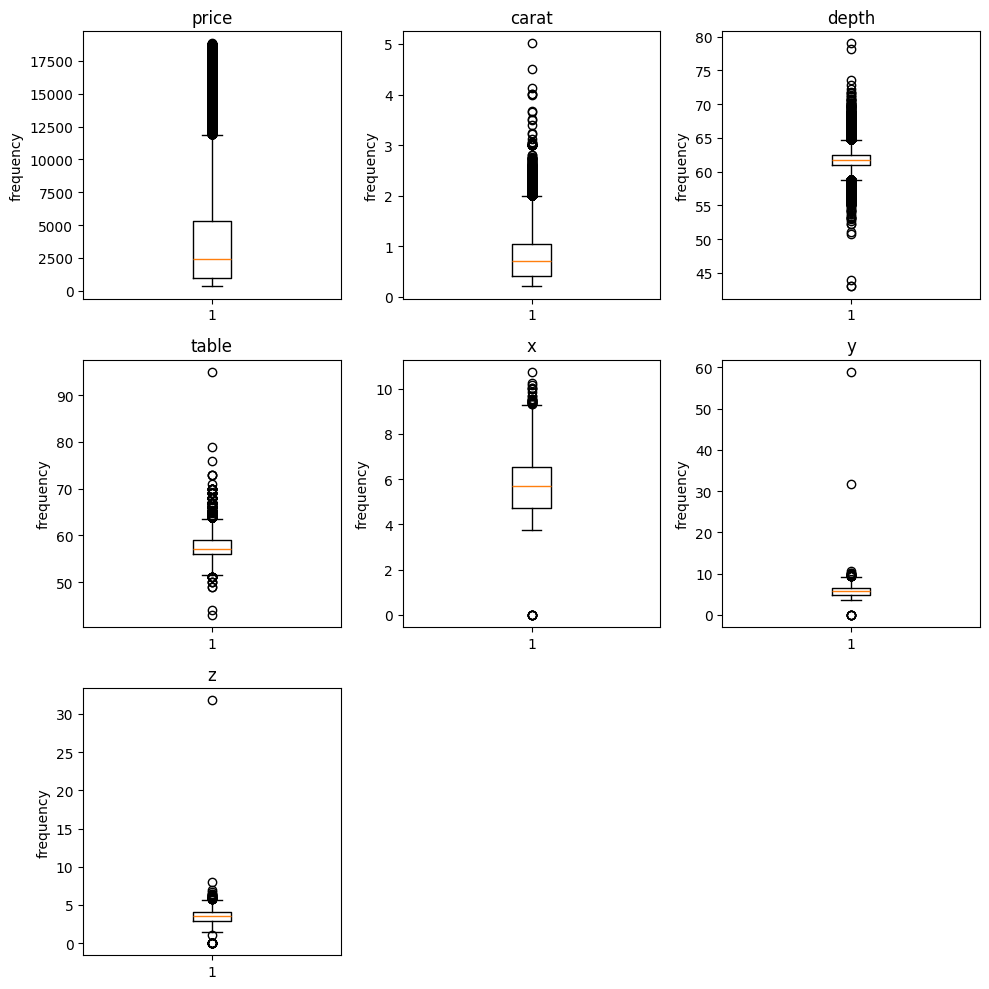

In [13]:
plt.figure(figsize=(10,10))
for i, col in enumerate(cont_data):
    plt.subplot(3,3,i+1)
    plt.boxplot(data[col])
    plt.ylabel(f"frequency")
    plt.title(col)
plt.tight_layout()
plt.show()    

In [14]:
def remove_outliers(columns):
    for column in columns:
        q1=data[column].quantile(.25)
        q3=data[column].quantile(.75)
        IQR=q3-q1
        upper_bound=q3+1.5*IQR
        lower_bound=q1-1.5*IQR
        data[column]=np.where(data[column]>upper_bound,upper_bound,data[column])
        data[column]=np.where(data[column]<lower_bound,lower_bound,data[column])

In [15]:
cont_data

,price,carat,depth,table,x,y,z
0,326,0.23,61.5,55.0,3.95,3.98,2.43
1,326,0.21,59.8,61.0,3.89,3.84,2.31
2,327,0.23,56.9,65.0,4.05,4.07,2.31
3,334,0.29,62.4,58.0,4.20,4.23,2.63
4,335,0.31,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,2757,0.72,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,61.0,58.0,6.15,6.12,3.74


In [16]:
remove_outliers(['price'	,'carat'	,'depth'	,'table'	,'x'	,'y'	,'z'])

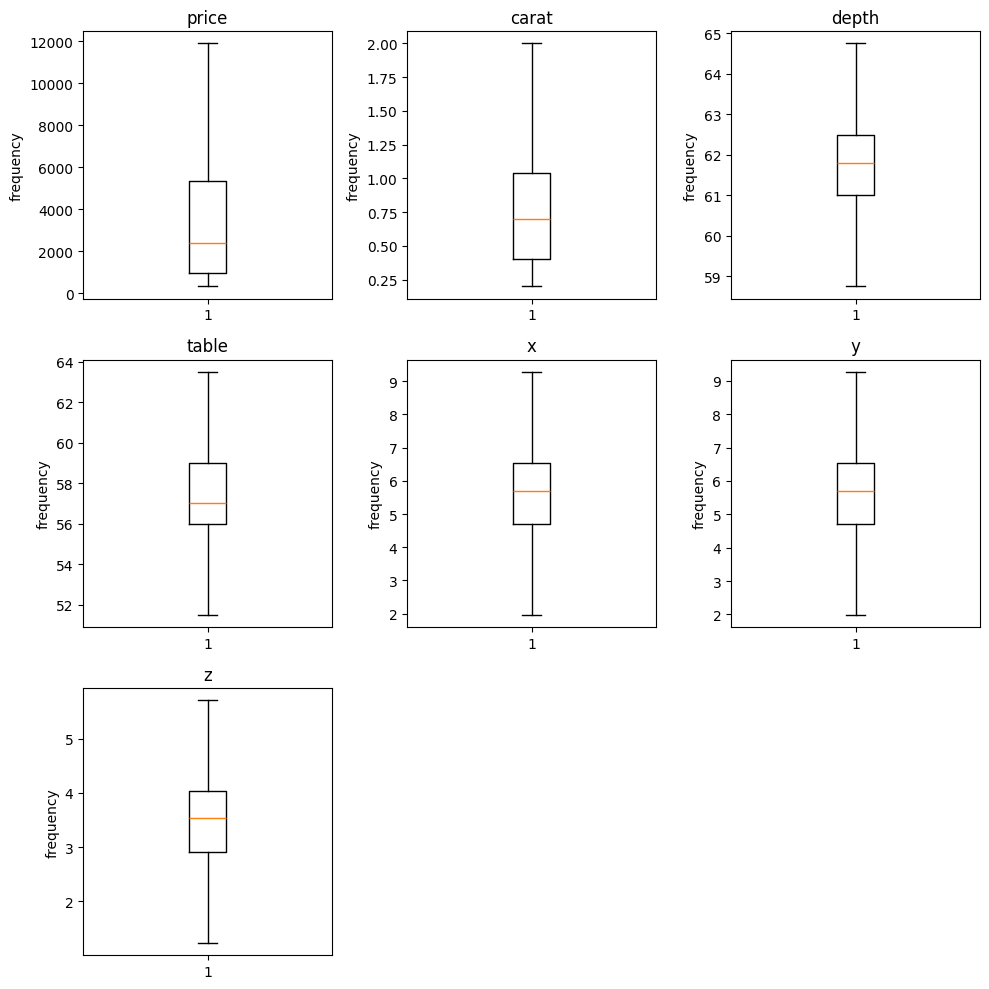

In [17]:
plt.figure(figsize=(10,10))
for i, col in enumerate(cont_data):
    plt.subplot(3,3,i+1)
    plt.boxplot(data[col])
    plt.ylabel(f"frequency")
    plt.title(col)
plt.tight_layout()
plt.show()    

RELATIONSHIP  BETWWEEN CONT VARIABLES

In [18]:
corr_matrix=cont_data.corr()
corr_matrix

,price,carat,depth,table,x,y,z
price,1.000000,0.921548,-0.011097,0.126566,0.884504,0.865395,0.861208
carat,0.921548,1.000000,0.027822,0.181091,0.975380,0.951908,0.953542
depth,-0.011097,0.027822,1.000000,-0.297334,-0.025351,-0.029388,0.094721
table,0.126566,0.181091,-0.297334,1.000000,0.194855,0.183231,0.150270
x,0.884504,0.975380,-0.025351,0.194855,1.000000,0.974592,0.970686
y,0.865395,0.951908,-0.029388,0.183231,0.974592,1.000000,0.951844
z,0.861208,0.953542,0.094721,0.150270,0.970686,0.951844,1.000000


<Axes: >

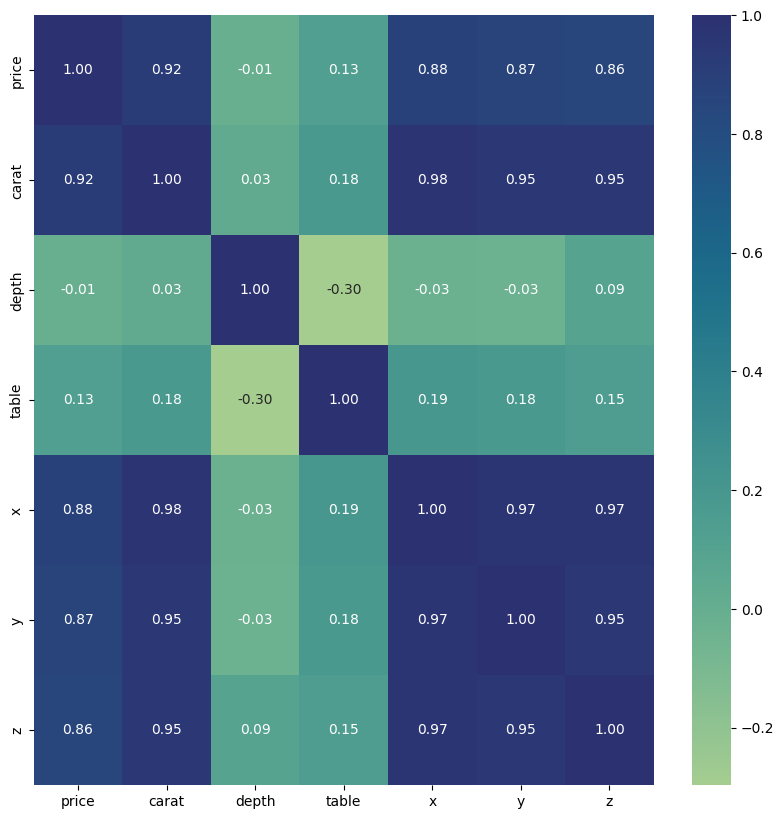

In [19]:
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix,annot=True, cmap="crest",fmt=".2f")

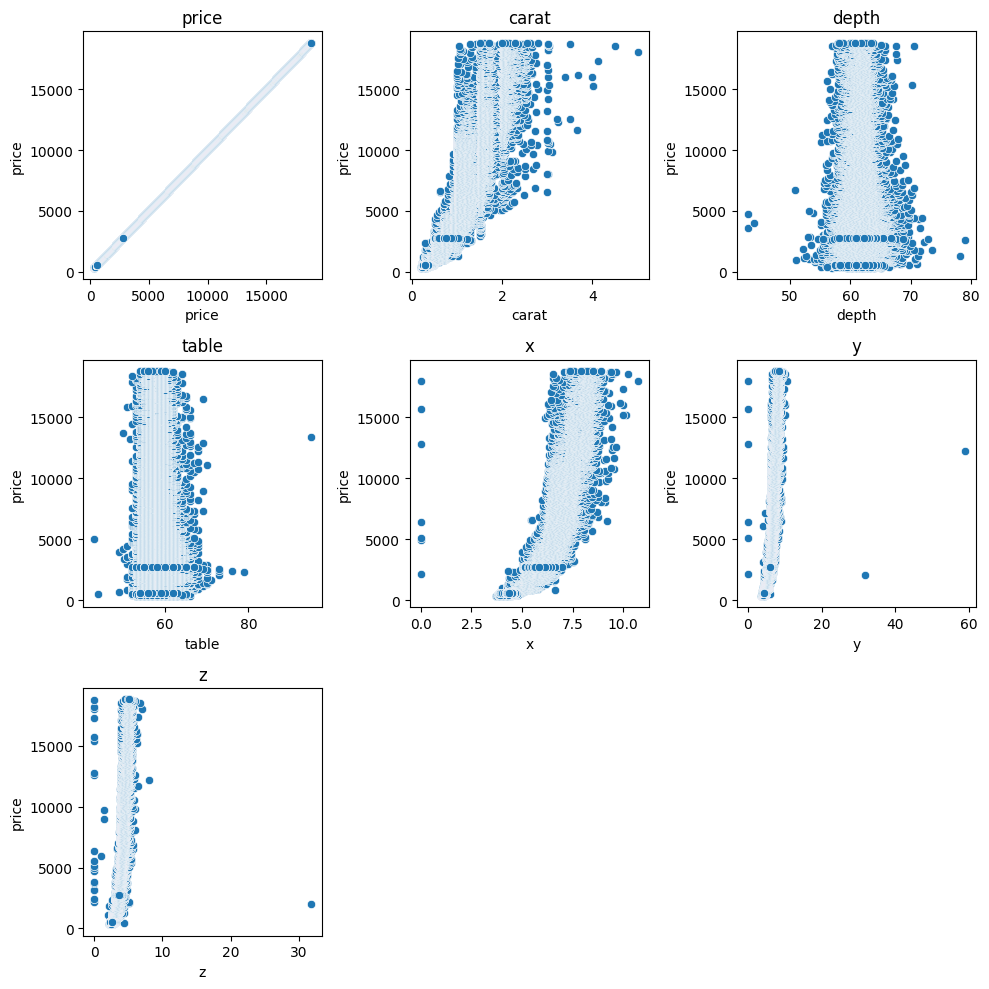

In [20]:
plt.figure(figsize=(10,10))
for i, col in enumerate(cont_data.columns):
    plt.subplot(3,3,i+1)
    sns.scatterplot(cont_data,x=col,y='price')
    plt.title(col)
    plt.ylabel(f'price')
plt.tight_layout()
plt.show()    

anova used when cont vs cat

In [21]:
def functionAnova(inpdata,targetvariable,categoricalpredictorlist):
    from scipy.stats import f_oneway
    selectedpredictors=[]
    print(f'##### AnovaReaults #######\n')
    for predictor in categoricalpredictorlist:
        grouplists=inpdata.groupby(predictor)[targetvariable].apply(list)
        AnovaResults=f_oneway(*grouplists)
        if(AnovaResults[1]<0.05):
            print(predictor,'is correlated with', targetvariable,'/p_value:',AnovaResults[1])
        else:
            print(predictor,'is not correlated with ',targetvariable,'/p_value:', AnovaResults[1])    

In [22]:
cat_data

,cut,color,clarity
0,Ideal,E,SI2
1,Premium,E,SI1
2,Good,E,VS1
3,Premium,I,VS2
4,Good,J,SI2
...,...,...,...
53935,Ideal,D,SI1
53936,Good,D,SI1
53937,Very Good,D,SI1
53938,Premium,H,SI2


In [23]:
categoricalpredictorlist=['cut'	,'color'	,'clarity']
functionAnova(inpdata=data,
              targetvariable='price',
              categoricalpredictorlist=categoricalpredictorlist)

##### AnovaReaults #######

cut is correlated with price /p_value: 4.981260203131401e-161
color is correlated with price /p_value: 0.0
clarity is correlated with price /p_value: 0.0


cat vs cat we use contigency tables

<Axes: xlabel='clarity', ylabel='cut'>

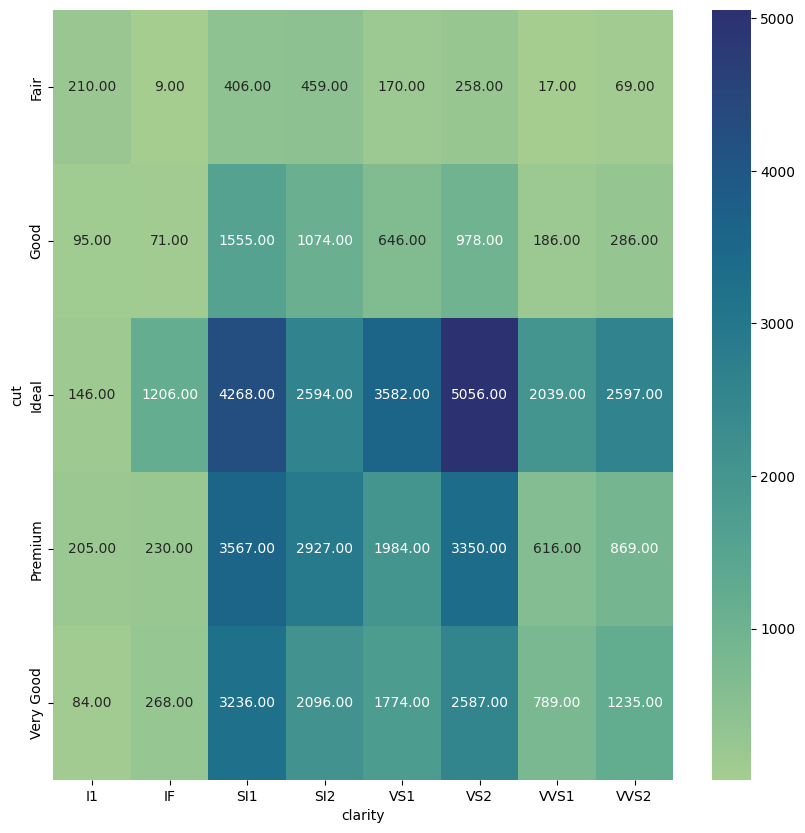

In [24]:
contigency_table=pd.crosstab(data['cut'],data['clarity'])
contigency_table
plt.figure(figsize=(10,10))
sns.heatmap(contigency_table,annot=True, cmap='crest',fmt='.2f')

In [25]:
 
from scipy.stats import chi2_contingency
import warnings

warnings.filterwarnings('ignore')
chi2, p, dof, expected=chi2_contingency(contigency_table)

print(f'Expected: {expected}\n Chi-square stat:{chi2}\n p-value:{p}\n Degree of freedom:{dof}')

Expected: [[  21.98237722   52.99535264  387.12748634  271.80912369  242.28144403
   363.27363647  108.33747258  150.19310704]
 [  67.28148121  162.20292226 1184.88143659  831.92642302  741.551028
  1111.87193739  331.58859724  459.69617429]
 [ 295.59281704  712.61835892 5205.62917798 3654.96523776 3257.91218351
  4884.87102651 1456.79324832 2019.61794996]
 [ 189.11997621  455.93248318 3330.5561215  2338.44294903 2084.40881883
  3125.33539056  932.05480165 1292.14945905]
 [ 166.02334833  400.250883   2923.8057776  2052.8562665  1829.84652563
  2743.64800907  818.22588021 1134.34330966]]
 Chi-square stat:4368.367573054015
 p-value:0.0
 Degree of freedom:28


In [26]:
data.columns

Index(['price', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

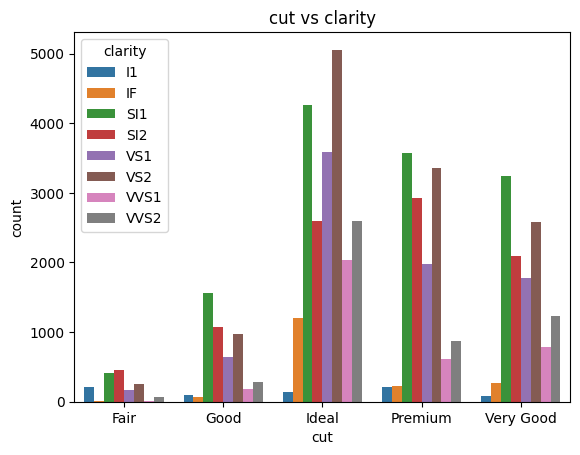

In [27]:
contigency_table_reset=contigency_table.reset_index()
melted_dataframe=contigency_table_reset.melt(id_vars='cut',var_name='clarity',value_name='count')
sns.barplot(x='cut',y='count',hue='clarity',data=melted_dataframe)
plt.title("cut vs clarity")
plt.ylabel('count')
plt.xlabel('cut')
plt.show

In [1]:
def grouped_barplot(x,y=y,hue,data):
    sns.barplot(x=x,hue=hue,data=data)
    plt.title("{x} vs{hue}")
    plt.ylabel(f"count")
    plt.xlabel({x})
    plt.show()

grouped_barplot(x='cut',hue='color',data=data)

SyntaxError: parameter without a default follows parameter with a default (1450593204.py, line 1)

machine learning 

In [29]:
import plotly.express as px
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



 

In [30]:
pd.read_csv("DiamondPricesData.csv")
diamond_df=pd.read_csv("DiamondPricesData.csv")
diamond_df


,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
1,326,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
3,334,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
4,335,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,Ideal,D,SI1,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,Good,D,SI1,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,Very Good,D,SI1,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,Premium,H,SI2,61.0,58.0,6.15,6.12,3.74


In [31]:
diamond_df.isnull().sum()

price       0
carat       0
cut         0
color       6
clarity     0
depth      14
table       0
x           0
y           0
z           0
dtype: int64

In [32]:
diamond_df["clarity"].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [33]:
diamond_df["clarity"].replace(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'], [0, 1, 2,3,4,5,6,7], inplace=True)

In [34]:
diamond_df['cut'].unique()
diamond_df['cut'].replace(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'],[0,1,2,3,4], inplace=True)

In [35]:
diamond_df.fillna(method="bfill",inplace=True)
diamond_df

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,0,E,0,61.5,55.0,3.95,3.98,2.43
1,326,0.21,1,E,1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,2,E,2,56.9,65.0,4.05,4.07,2.31
3,334,0.29,1,I,3,62.4,58.0,4.20,4.23,2.63
4,335,0.31,2,J,0,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,0,D,1,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,2,D,1,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,3,D,1,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,1,H,0,61.0,58.0,6.15,6.12,3.74


In [36]:
diamond_df['color'].unique()
diamond_df['color'].replace(['E', 'I', 'J', 'H', 'F', 'D', 'G'],[0,1,2,3,4,5,6],inplace=True)



generating the target output

In [37]:
diamond_df.drop_duplicates()

,price,carat,cut,color,clarity,depth,table,x,y,z
0,326,0.23,0,0,0,61.5,55.0,3.95,3.98,2.43
1,326,0.21,1,0,1,59.8,61.0,3.89,3.84,2.31
2,327,0.23,2,0,2,56.9,65.0,4.05,4.07,2.31
3,334,0.29,1,1,3,62.4,58.0,4.20,4.23,2.63
4,335,0.31,2,2,0,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,2757,0.72,0,5,1,60.8,57.0,5.75,5.76,3.50
53936,2757,0.72,2,5,1,63.1,55.0,5.69,5.75,3.61
53937,2757,0.70,3,5,1,62.8,60.0,5.66,5.68,3.56
53938,2757,0.86,1,3,0,61.0,58.0,6.15,6.12,3.74


In [38]:
y=diamond_df['price']
y

0         326
1         326
2         327
3         334
4         335
         ... 
53935    2757
53936    2757
53937    2757
53938    2757
53939    2757
Name: price, Length: 53940, dtype: int64

In [39]:
corr_matrix=diamond_df.corr()
corr_matrix

,price,carat,cut,color,clarity,depth,table,x,y,z
price,1.000000,0.921591,0.049421,-0.002900,-0.140270,-0.010697,0.127134,0.884435,0.865421,0.861249
carat,0.921591,1.000000,0.114426,-0.050663,-0.281218,0.028186,0.181618,0.975094,0.951722,0.953387
cut,0.049421,0.114426,1.000000,-0.033712,-0.118670,0.170010,0.381988,0.105361,0.105319,0.126726
color,-0.002900,-0.050663,-0.033712,1.000000,0.064206,0.001105,-0.038517,-0.041040,-0.040863,-0.041574
clarity,-0.140270,-0.281218,-0.118670,0.064206,1.000000,-0.025892,-0.133692,-0.305918,-0.297037,-0.299969
depth,-0.010697,0.028186,0.170010,0.001105,-0.025892,1.000000,-0.295445,-0.025292,-0.029340,0.094888
table,0.127134,0.181618,0.381988,-0.038517,-0.133692,-0.295445,1.000000,0.195344,0.183760,0.150929
x,0.884435,0.975094,0.105361,-0.041040,-0.305918,-0.025292,0.195344,1.000000,0.974701,0.970772
y,0.865421,0.951722,0.105319,-0.040863,-0.297037,-0.029340,0.183760,0.974701,1.000000,0.952006
z,0.861249,0.953387,0.126726,-0.041574,-0.299969,0.094888,0.150929,0.970772,0.952006,1.000000


generating predictor output

In [40]:
X=diamond_df[['y','z','x','carat']]
X

,y,z,x,carat
0,3.98,2.43,3.95,0.23
1,3.84,2.31,3.89,0.21
2,4.07,2.31,4.05,0.23
3,4.23,2.63,4.20,0.29
4,4.35,2.75,4.34,0.31
...,...,...,...,...
53935,5.76,3.50,5.75,0.72
53936,5.75,3.61,5.69,0.72
53937,5.68,3.56,5.66,0.70
53938,6.12,3.74,6.15,0.86


In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


training model

In [42]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

predicting using model

In [43]:
y_pred=model.predict(X_test)

In [44]:
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)

In [45]:
print(f"r^2 score: {r2:.2f}")
print(f" mean squared error:{mse:.3f}")
print(f" root mean squared error:{rmse:.3f}")

r^2 score: 0.85
 mean squared error:2315903.688
 root mean squared error:1521.809


In [46]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error
y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
print(f"r^2 score: {r2:.2f}")
print(f" mean squared error:{mse:.3f}")
print(f" root mean squared error:{rmse:.3f}")

r^2 score: 0.77
 mean squared error:3663122.122
 root mean squared error:1913.928


In [47]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
from sklearn.metrics import r2_score,mean_squared_error,root_mean_squared_error
y_pred=model.predict(X_test)
r2=r2_score(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
print(f"r^2 score: {r2:.2f}")
print(f" mean squared error:{mse:.3f}")
print(f" root mean squared error:{rmse:.3f}")

r^2 score: 0.87
 mean squared error:2054303.888
 root mean squared error:1433.284


In [52]:
from sklearn.metrics import classification_report
classification_report(y_test,y_test)

'              precision    recall  f1-score   support\n\n         335       1.00      1.00      1.00         1\n         336       1.00      1.00      1.00         1\n         337       1.00      1.00      1.00         1\n         357       1.00      1.00      1.00         3\n         358       1.00      1.00      1.00         1\n         360       1.00      1.00      1.00         1\n         361       1.00      1.00      1.00         1\n         363       1.00      1.00      1.00         2\n         364       1.00      1.00      1.00         1\n         367       1.00      1.00      1.00         4\n         368       1.00      1.00      1.00         2\n         369       1.00      1.00      1.00         1\n         373       1.00      1.00      1.00         3\n         377       1.00      1.00      1.00         1\n         378       1.00      1.00      1.00         3\n         380       1.00      1.00      1.00         1\n         383       1.00      1.00      1.00         1\n       